In [9]:
import pandas as pd 
import numpy as np 
import os
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams[]
train=pd.read_csv('./train_x.csv')

In [10]:
train=train.drop('Unnamed: 0',axis=1)
train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0,1
1,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0,0
2,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0,0
3,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0,0
4,0.907239,49.0,1.0,0.024926,6107.322992,7.0,0.0,1.0,0.0,0.0,0


In [11]:
train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.303701,52.295555,0.245794,0.348610,6107.322992,8.452760,0.090456,1.018240,0.064823,0.757222,0.066840
std,0.334048,14.771249,0.697154,0.293353,3413.699317,5.145951,0.485092,1.129771,0.329777,1.100404,0.249746
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3903.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.348610,6107.322992,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.506656,63.000000,0.000000,0.409619,7183.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,109.000000,13.000000,2.942711,22766.000000,58.000000,17.000000,54.000000,11.000000,20.000000,1.000000


Text(0.5, 1.0, 'RevolvingUtilizationOfUnsecuredLines KDE plot')

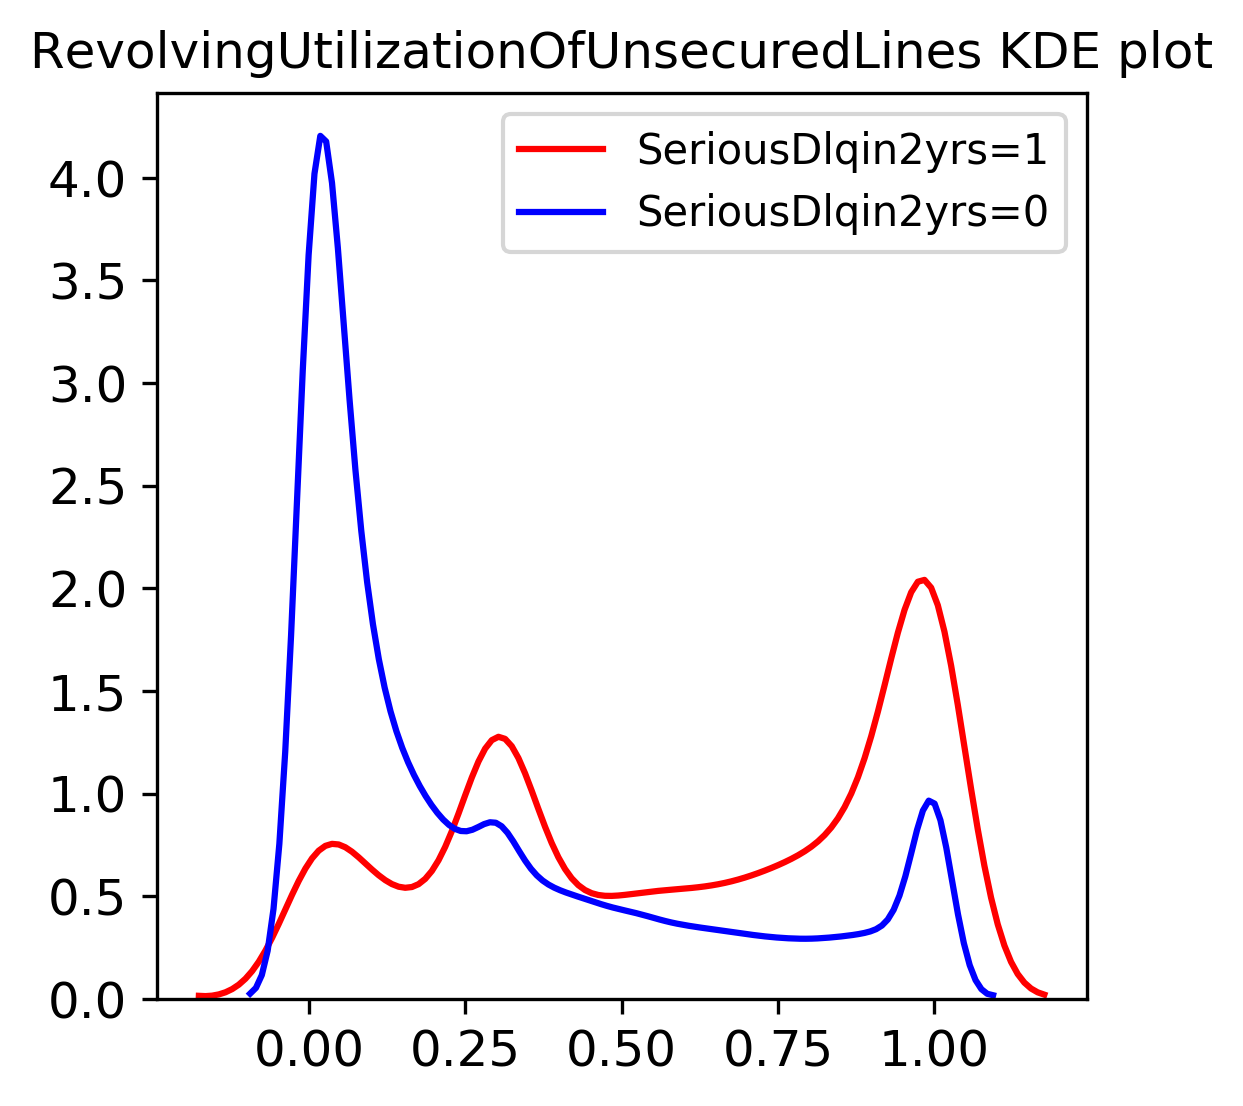

In [30]:
import seaborn as sns
plt.figure(dpi=300,figsize=(4,4))
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==1),'RevolvingUtilizationOfUnsecuredLines'],color='red',
           label='SeriousDlqin2yrs=1')
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==0),'RevolvingUtilizationOfUnsecuredLines'],color='blue',
           label='SeriousDlqin2yrs=0')
plt.title('RevolvingUtilizationOfUnsecuredLines KDE plot')

Text(0.5, 1.0, 'age KDE plot')

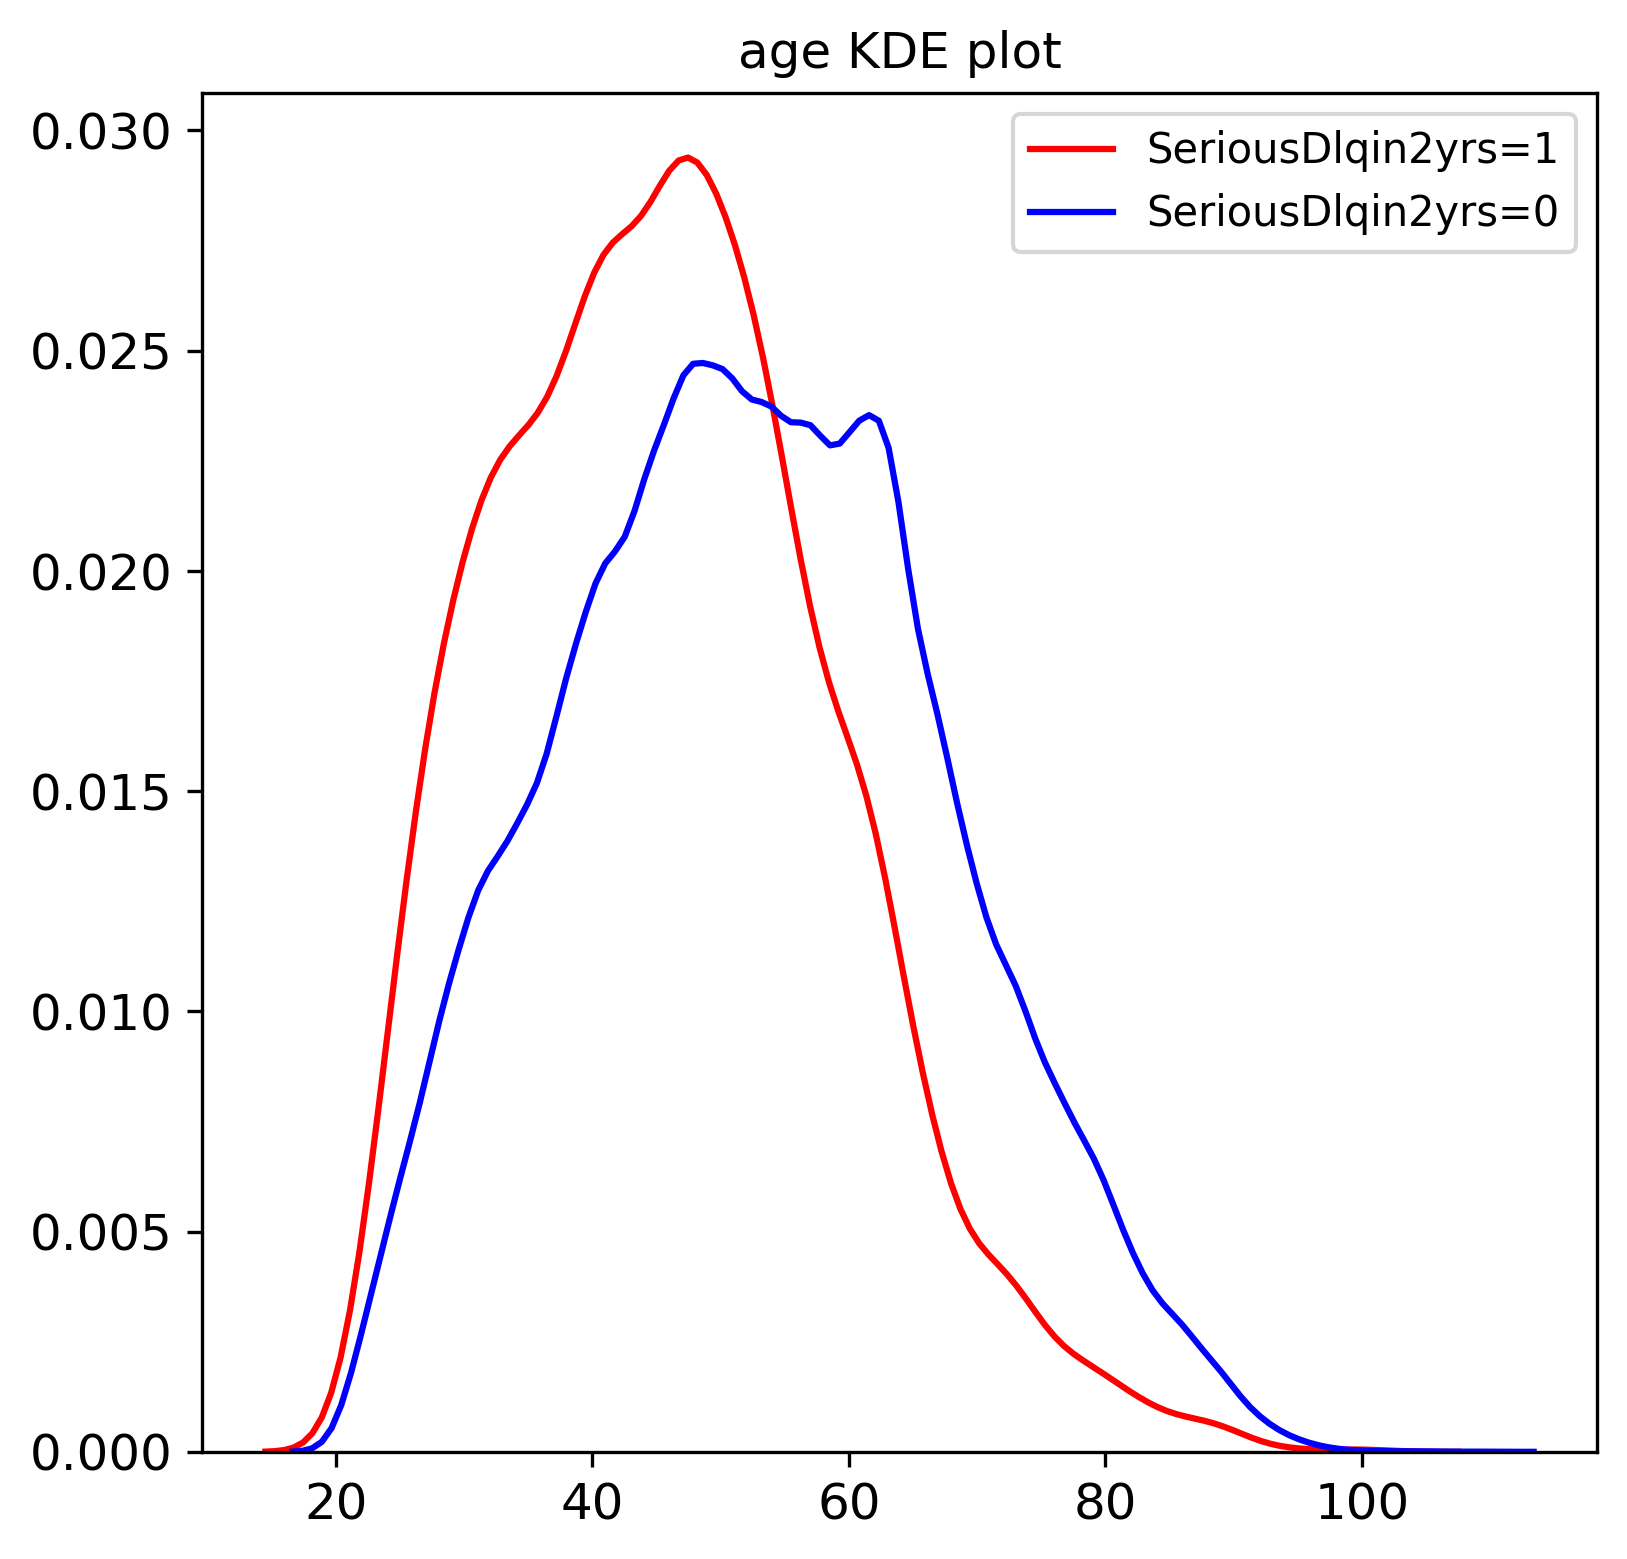

In [36]:
plt.figure(dpi=300,figsize=(6,6))
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==1),'age'],color='red',
           label='SeriousDlqin2yrs=1')
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==0),'age'],color='blue',
           label='SeriousDlqin2yrs=0')
plt.title('age KDE plot')

Text(0.5, 1.0, 'DebtRatio KDE plot')

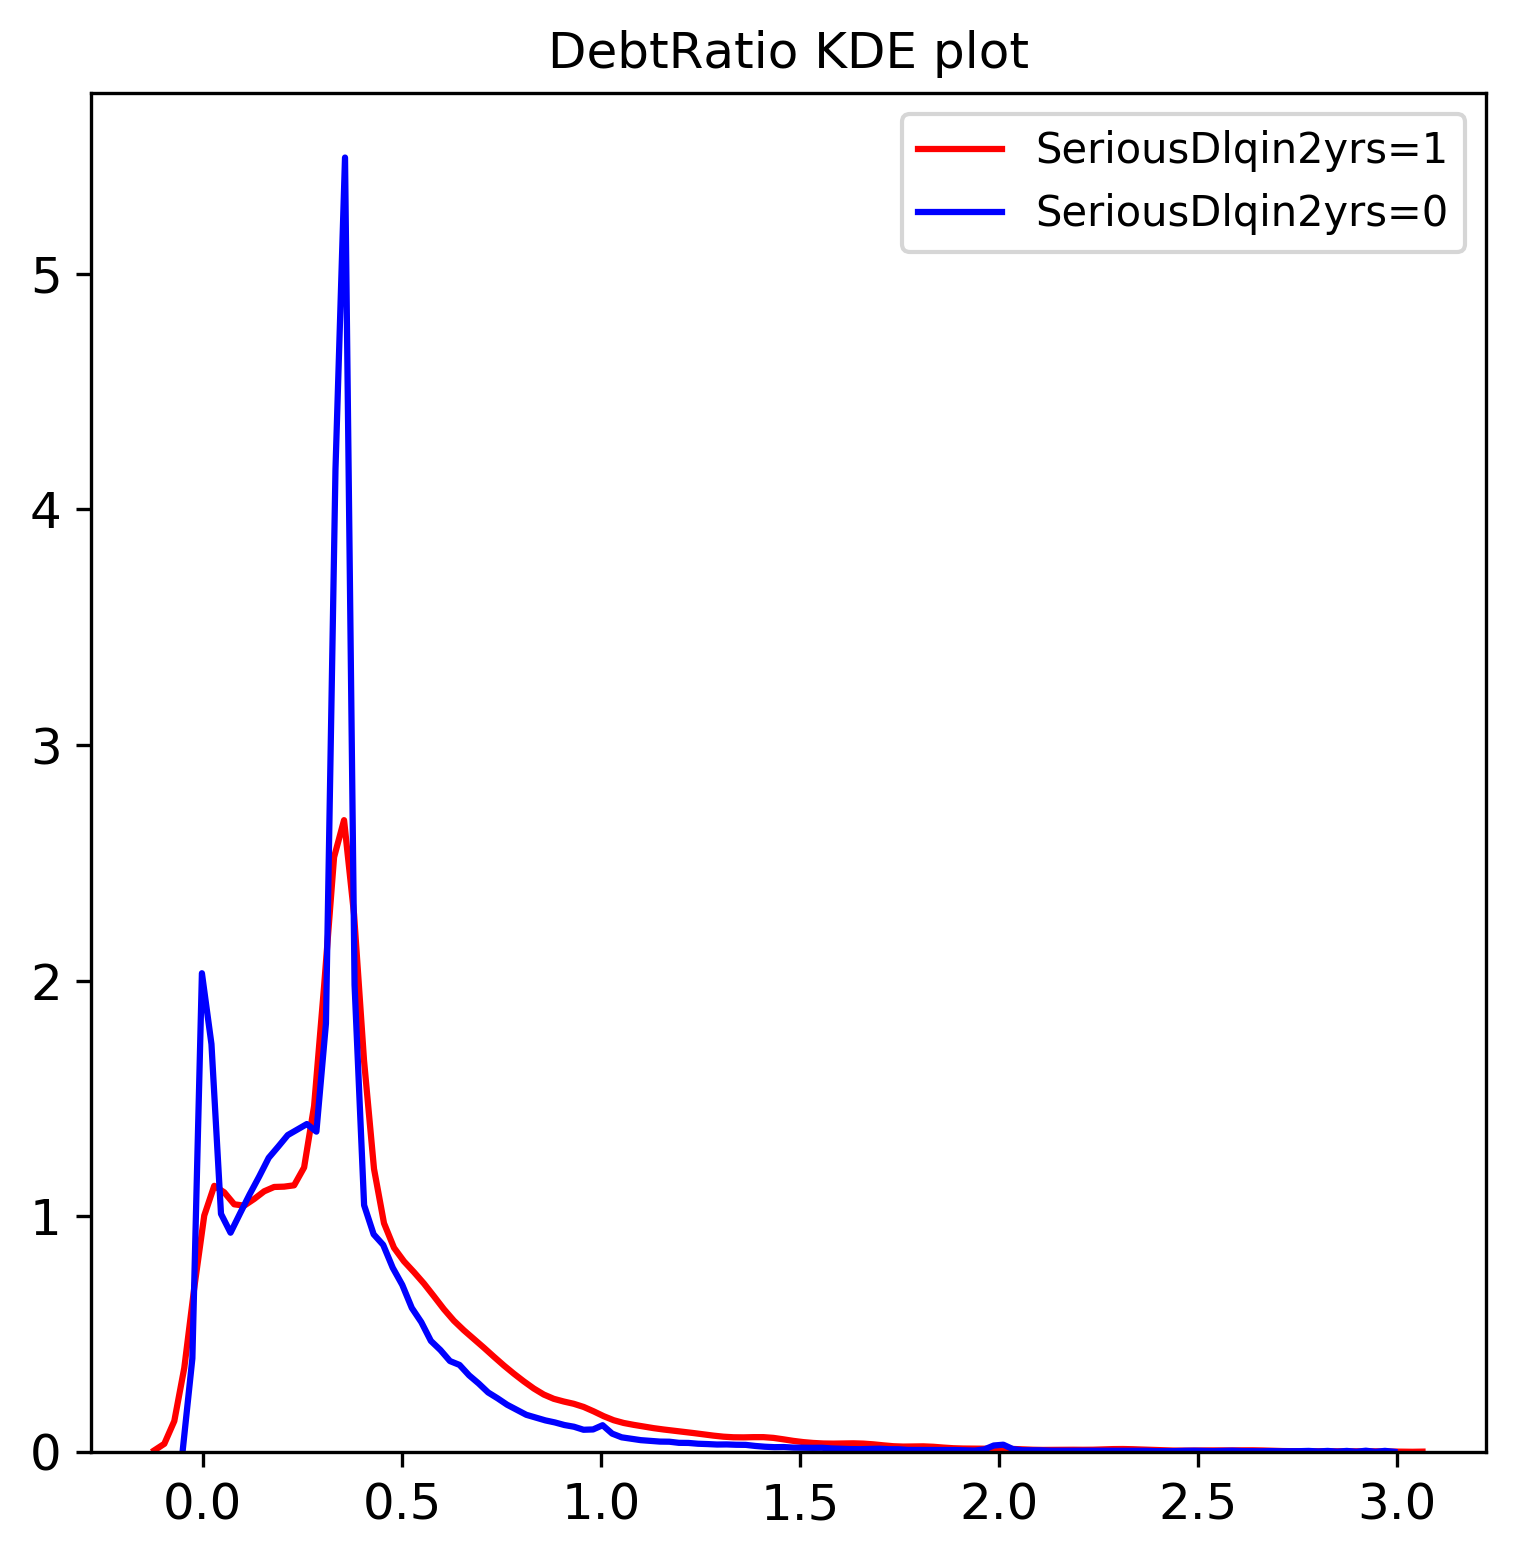

In [38]:
plt.figure(dpi=300,figsize=(6,6))
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==1),'DebtRatio'],color='red',
           label='SeriousDlqin2yrs=1')
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==0),'DebtRatio'],color='blue',
           label='SeriousDlqin2yrs=0')
plt.title('DebtRatio KDE plot')

Text(0.5, 1.0, 'MonthlyIncome KDE plot')

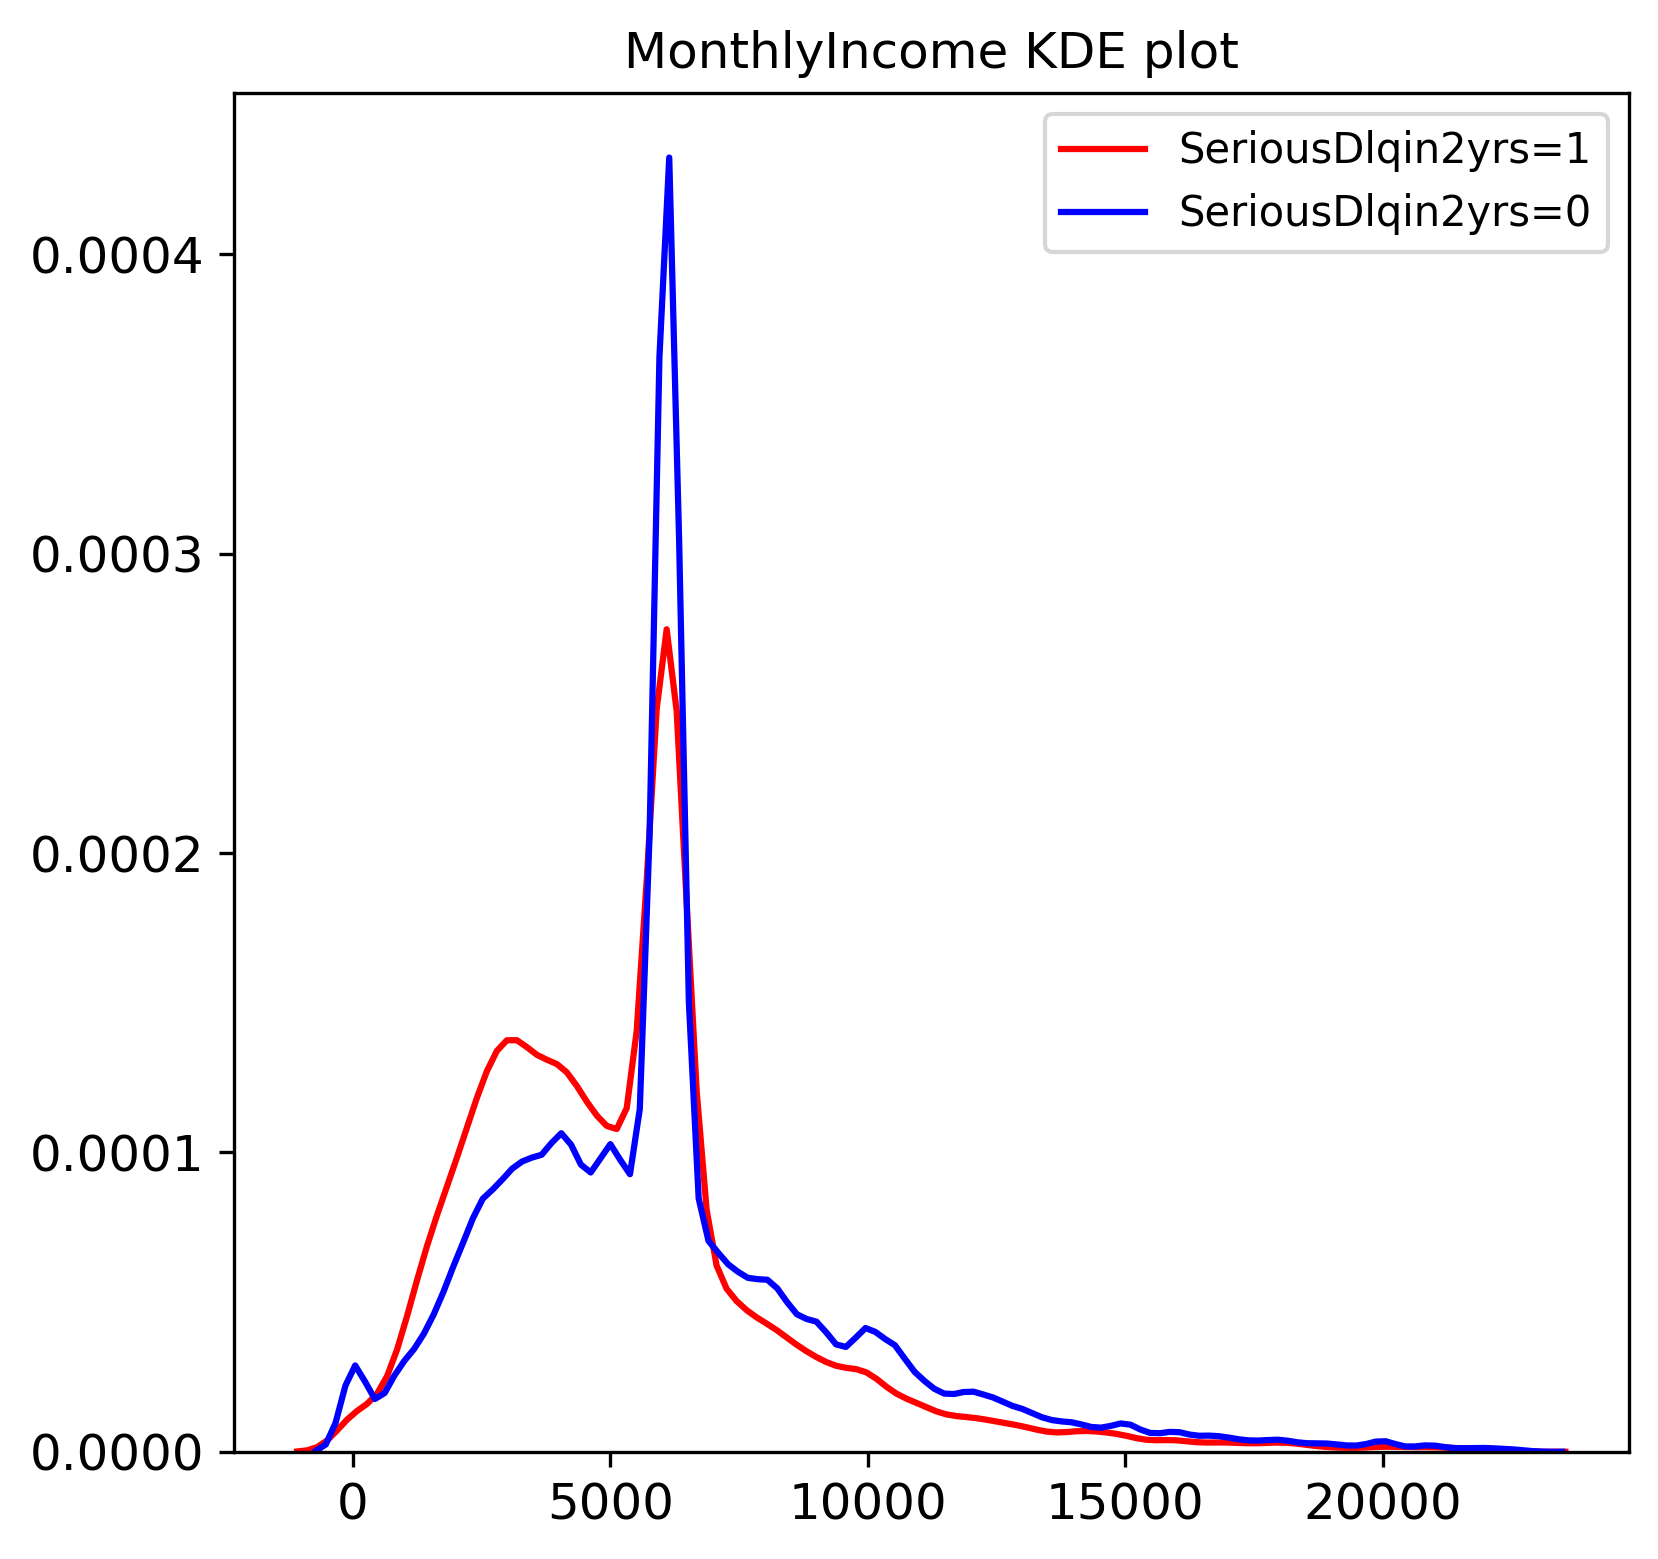

In [39]:
plt.figure(dpi=300,figsize=(6,6))
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==1),'MonthlyIncome'],color='red',
           label='SeriousDlqin2yrs=1')
sns.kdeplot(train.loc[(train['SeriousDlqin2yrs']==0),'MonthlyIncome'],color='blue',
           label='SeriousDlqin2yrs=0')
plt.title('MonthlyIncome KDE plot')